# CCSR level prediction using ICD10 code descriptions 

The Clinical Classifications Software Refined (CCSR) for ICD-10-CM diagnoses aggregates over 70,000 ICD-10-CM diagnosis codes into a manageable number of clinically meaningful categories. The CCSR is based on the International Classification of Diseases, 10th Revision, Clinical Modification (ICD-10-CM).
 
The CCSR for ICD-10-CM diagnoses provides a means by which to identify specific clinical conditions using ICD-10-CM diagnosis codes.

Here, we are trying to determine the predictiveness of each of the clinical conditions by using Goggle's NLP embeding (Universal sentence encoder V4) by passing to it the ICD10 code textual description. The generation of such a model, can be used to link other coding standards (ICD9, ICD10, ICPC2) with the new CCSR categories. 

In [2]:
#!pip install tensorflow tensorflow_hub
import tensorflow_hub as hub

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [5]:
import sqlite3
conn = sqlite3.connect('C:/Users/Thomas/Documents/Python Scripts/researchroom/Diagnoses_Procedures.db')

In [7]:
df = pd.read_sql("SELECT * FROM ccsr_icd10_idc9",conn)
df.head()

,ICD10_CM_Code,ICD_10_CM_Code_Description,CCSR_main,CCSR_Category,CCSR_Category_Description,Inpatient_Default_CCSR,Outpatient_Default_CCSR,Rationale,ICD9_CM,convertions
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol...",DIG,DIG001,Intestinal infection,Y,Y,06 Infectious conditions,0010,00000
1,A000,"Cholera due to Vibrio cholerae 01, biovar chol...",INF,INF003,Bacterial infections,N,N,06 Infectious conditions,0010,00000
2,A001,"Cholera due to Vibrio cholerae 01, biovar eltor",DIG,DIG001,Intestinal infection,Y,Y,06 Infectious conditions,0011,00000
3,A001,"Cholera due to Vibrio cholerae 01, biovar eltor",INF,INF003,Bacterial infections,N,N,06 Infectious conditions,0011,00000
4,A009,"Cholera, unspecified",DIG,DIG001,Intestinal infection,Y,Y,06 Infectious conditions,0019,00000


In [8]:
embeddings = embed(df['ICD_10_CM_Code_Description'])

print(embeddings[0])

tf.Tensor(
[ 0.04728025  0.01177642  0.04350144  0.05627881  0.07156327 -0.00061501
  0.04018252 -0.0053508   0.02159576  0.03889713  0.05445824  0.06724766
  0.02421597  0.05934124 -0.05515568  0.00207645 -0.08527783 -0.03957943
  0.01492176 -0.06024409 -0.00576918 -0.06536563 -0.07690498  0.01196917
  0.04742838 -0.00206109  0.02026853 -0.03540529 -0.06308294  0.09192119
  0.04794555  0.07787503  0.02110581 -0.06575801  0.02538091 -0.01537867
 -0.05465139 -0.02659817 -0.05431229  0.00881401  0.0335029  -0.04448883
  0.01918749  0.0572885   0.03187881  0.06333872 -0.01270234  0.06255998
  0.06287923 -0.02045491 -0.00308029 -0.07031523 -0.06978075 -0.06650376
 -0.02905534 -0.06024799  0.00754307  0.00601659  0.04040705 -0.00077322
 -0.06728392  0.04105552 -0.03723062 -0.04041443 -0.05321699  0.02743031
 -0.000789   -0.00348014 -0.05758856 -0.04668105 -0.0760543   0.0099338
  0.02693252  0.07880931  0.02016394 -0.00220452  0.01414737 -0.0163158
 -0.04099792 -0.04025291 -0.07237887 -0.04

In [18]:
X = np.array(embeddings)
X.shape

(91767, 512)

In [9]:
y = df['CCSR_main']
y[0]

'DIG'

In [15]:
print(y.unique())
print(len(y.unique()))
print(y.count())

['DIG' 'INF' 'NVS' 'RSP' 'MUS' 'GEN' 'EYE' 'EAR' 'END' 'CIR' 'BLD' 'SKN'
 'PNL' 'PRG' 'INJ' 'NEO' 'SYM' 'MBD' 'FAC' 'MAL' 'EXT']
21
91767


In [22]:
cnt = y.groupby(y).count()
cnt

CCSR_main
BLD      316
CIR     1995
DIG     1293
EAR      766
END     1751
EXT    12840
EYE     3538
FAC     1405
GEN     1126
INF     2059
INJ    44222
MAL      962
MBD     2587
MUS     7154
NEO     1892
NVS     1143
PNL      638
PRG     3750
RSP      561
SKN      985
SYM      784
Name: CCSR_main, dtype: int64

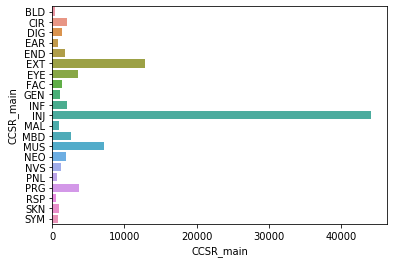

In [25]:
sns.barplot(cnt,cnt.index)

In [19]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101)

In [21]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(59648, 512)
(59648,)
(32119, 512)
(32119,)


In [35]:
y_train_dummy = pd.get_dummies(y_train)
y_train_dummy.head()

,BLD,CIR,DIG,EAR,END,EXT,EYE,FAC,GEN,INF,...,MAL,MBD,MUS,NEO,NVS,PNL,PRG,RSP,SKN,SYM
25901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
70204,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
62809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21775,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
34507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y_test_dummy = pd.get_dummies(y_test)
y_test_dummy.head()

,BLD,CIR,DIG,EAR,END,EXT,EYE,FAC,GEN,INF,...,MAL,MBD,MUS,NEO,NVS,PNL,PRG,RSP,SKN,SYM
46630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87040,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score
import tensorflow as tf

In [222]:
model = Sequential()
model.add(tf.keras.Input(shape=(512,)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(125, activation='relu'))
model.add(Dense(21, activation='softmax'))

In [223]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 125)               32125     
_________________________________________________________________
dense_43 (Dense)             (None, 21)                2646      
Total params: 166,099
Trainable params: 166,099
Non-trainable params: 0
_________________________________________________________________


In [163]:
from keras.callbacks import Callback, EarlyStopping
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [224]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',f1_m,precision_m, recall_m])

In [225]:
res = model.fit(X_train,y_train_dummy,
               validation_data=(X_test, y_test_dummy),
               epochs=20)

Epoch 1/20
1864/1864 [==============================] - 4s 2ms/step - loss: 0.5461 - accuracy: 0.8281 - f1_m: 0.8291 - precision_m: 0.9005 - recall_m: 0.7740 - val_loss: 0.3594 - val_accuracy: 0.8741 - val_f1_m: 0.8753 - val_precision_m: 0.9169 - val_recall_m: 0.8385
Epoch 2/20
1864/1864 [==============================] - 4s 2ms/step - loss: 0.3262 - accuracy: 0.8841 - f1_m: 0.8864 - precision_m: 0.9207 - recall_m: 0.8556 - val_loss: 0.3178 - val_accuracy: 0.8897 - val_f1_m: 0.8908 - val_precision_m: 0.9179 - val_recall_m: 0.8662
Epoch 3/20
1864/1864 [==============================] - 4s 2ms/step - loss: 0.2783 - accuracy: 0.8957 - f1_m: 0.8979 - precision_m: 0.9249 - recall_m: 0.8732 - val_loss: 0.2784 - val_accuracy: 0.8917 - val_f1_m: 0.8933 - val_precision_m: 0.9199 - val_recall_m: 0.8689
Epoch 4/20
1864/1864 [==============================] - 4s 2ms/step - loss: 0.2506 - accuracy: 0.9020 - f1_m: 0.9039 - precision_m: 0.9274 - recall_m: 0.8823 - val_loss: 0.2664 - val_accuracy: 0.8

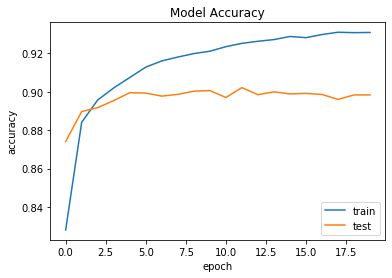

In [226]:
# plotting the metrics: Accuracy
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

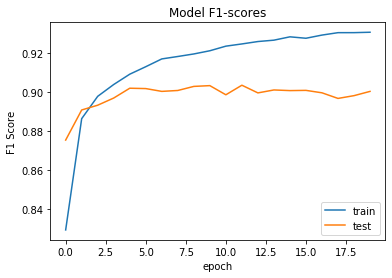

In [227]:
# plotting the metrics: Accuracy
plt.plot(res.history['f1_m'])
plt.plot(res.history['val_f1_m'])
plt.title('Model F1-scores')
plt.ylabel('F1 Score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

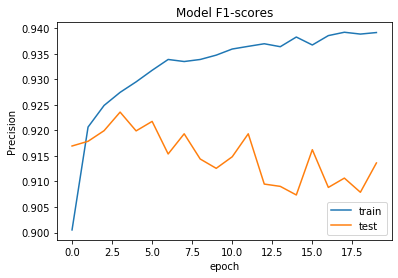

In [228]:
# plotting the metrics: Accuracy
plt.plot(res.history['precision_m'])
plt.plot(res.history['val_precision_m'])
plt.title('Model F1-scores')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

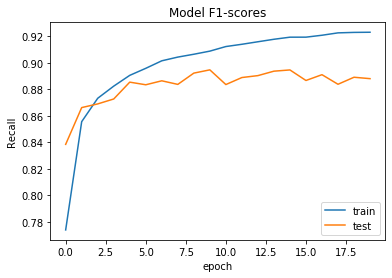

In [229]:
# plotting the metrics: Accuracy
plt.plot(res.history['recall_m'])
plt.plot(res.history['val_recall_m'])
plt.title('Model F1-scores')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

In [230]:
predicted_classes = model.predict_classes(X_test)
predicted_classes[0:10]

array([10, 10, 10, 10,  5, 10, 13, 10,  5, 11], dtype=int64)

In [231]:
pd.crosstab(predicted_classes,y_test)

CCSR_main,BLD,CIR,DIG,EAR,END,EXT,EYE,FAC,GEN,INF,...,MAL,MBD,MUS,NEO,NVS,PNL,PRG,RSP,SKN,SYM
row_0,,,,,,,,,,,,,,,,,,,,,
0,50,1,1,0,6,0,1,0,1,5,...,1,0,5,1,3,0,0,0,2,3
1,4,572,16,0,3,0,2,5,8,9,...,4,1,14,0,4,2,28,0,2,3
2,3,21,315,0,6,0,1,3,2,27,...,3,3,27,3,2,5,0,1,3,11
3,0,0,0,244,0,0,3,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4,6,16,3,0,512,1,114,6,19,8,...,6,1,8,2,34,2,27,1,13,7
5,0,0,1,0,1,4410,0,9,0,2,...,0,174,0,0,1,1,1,0,1,0
6,0,3,2,7,0,0,1056,1,0,29,...,4,0,6,3,1,2,0,0,2,0
7,0,4,0,2,1,2,1,417,3,0,...,2,1,0,0,0,0,6,0,1,0
8,0,3,0,0,6,0,6,2,274,23,...,19,1,0,2,0,0,21,0,2,8


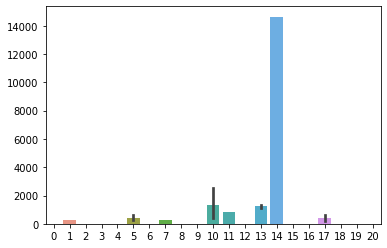

In [233]:
pc = pd.Series(predicted_classes)
cnt = pc.groupby(pc).count()
sns.barplot(pc, cnt)

In [234]:
ct/ct.sum()

CCSR_main,BLD,CIR,DIG,EAR,END,EXT,EYE,FAC,GEN,INF,...,MAL,MBD,MUS,NEO,NVS,PNL,PRG,RSP,SKN,SYM
row_0,,,,,,,,,,,,,,,,,,,,,
0,0.527473,0.001412,0.000000,0.000000,0.013136,0.000000,0.000804,0.000000,0.002433,0.008197,...,0.008955,0.000000,0.001599,0.003072,0.002532,0.000000,0.000000,0.005181,0.000000,0.010453
1,0.054945,0.779661,0.025761,0.000000,0.003284,0.000000,0.000804,0.004255,0.012165,0.010929,...,0.011940,0.001064,0.001998,0.001536,0.022785,0.000000,0.007628,0.000000,0.006211,0.017422
2,0.010989,0.031073,0.742389,0.003817,0.001642,0.000000,0.000804,0.004255,0.002433,0.027322,...,0.005970,0.003191,0.010392,0.004608,0.005063,0.016529,0.002288,0.015544,0.000000,0.024390
3,0.000000,0.000000,0.000000,0.973282,0.000000,0.000000,0.012058,0.002128,0.000000,0.004098,...,0.002985,0.000000,0.000400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.076923,0.018362,0.007026,0.000000,0.852217,0.000000,0.091640,0.006383,0.026764,0.012295,...,0.014925,0.001064,0.003597,0.001536,0.093671,0.008264,0.006865,0.005181,0.040373,0.017422
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.988771,0.000000,0.004255,0.000000,0.000000,...,0.000000,0.224468,0.000000,0.000000,0.000000,0.004132,0.000000,0.000000,0.003106,0.000000
6,0.000000,0.004237,0.007026,0.007634,0.004926,0.000000,0.848875,0.004255,0.009732,0.038251,...,0.008955,0.000000,0.001599,0.003072,0.002532,0.004132,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.005650,0.000000,0.000000,0.001642,0.000661,0.000000,0.900000,0.000000,0.001366,...,0.002985,0.000000,0.000000,0.000000,0.005063,0.000000,0.003814,0.000000,0.000000,0.010453
8,0.021978,0.002825,0.002342,0.000000,0.009852,0.000000,0.001608,0.012766,0.710462,0.046448,...,0.056716,0.002128,0.000400,0.004608,0.002532,0.000000,0.022883,0.005181,0.009317,0.020906


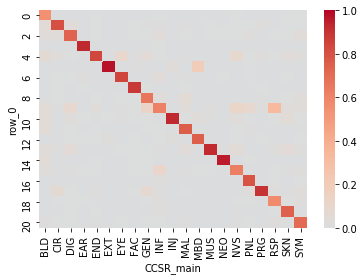

In [235]:
ct = pd.crosstab(predicted_classes,y_test)

sns.heatmap(ct/ct.sum(),cmap='coolwarm', center=0.01, vmin=0, vmax=1)

In [236]:
np.diagonal(ct/ct.sum())

array([0.54945055, 0.8079096 , 0.73770492, 0.93129771, 0.8407225 ,
       0.97093791, 0.8488746 , 0.88723404, 0.66666667, 0.61885246,
       0.93739074, 0.7641791 , 0.75531915, 0.92246203, 0.95852535,
       0.62278481, 0.7892562 , 0.90083905, 0.56994819, 0.7484472 ,
       0.71428571])

In [237]:
y_cnt = y.groupby(y).count()

In [238]:
pred_final = pd.DataFrame([np.array(y_cnt.index),np.array(y_cnt), np.diagonal(ct/ct.sum())])
pred_final = pred_final.transpose()
pred_final.columns = ['class','y_count','prediction_accuracy']

In [239]:
pred_final

,class,y_count,prediction_accuracy
0,BLD,316,0.549451
1,CIR,1995,0.80791
2,DIG,1293,0.737705
3,EAR,766,0.931298
4,END,1751,0.840722
5,EXT,12840,0.970938
6,EYE,3538,0.848875
7,FAC,1405,0.887234
8,GEN,1126,0.666667
9,INF,2059,0.618852


In [240]:
model.save('C:/Users/Thomas/Documents/Python Scripts/researchroom/CCSR_encoder.kmodel')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: C:/Users/Thomas/Documents/Python Scripts/researchroom/CCSR_encoder.kmodel\assets


INFO:tensorflow:Assets written to: C:/Users/Thomas/Documents/Python Scripts/researchroom/CCSR_encoder.kmodel\assets


In [ ]:
# model = keras.models.load_model('C:/Users/Thomas/Documents/Python Scripts/researchroom/CCSR_encoder.kmodel')